### importing library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import seaborn as sns

from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping


### Data preprocessing

#### Reading data csv

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


#### Droping na value 

In [3]:
df.isna().sum()
newdf = df.dropna()

#### Checking and dropping outliers

Outliers:  [array([34828.65, 34838.87, 35069.37, 35147.53, 35160.13, 35491.64,
       35585.58, 35595.59, 36021.01, 36085.22, 36124.57, 36149.48,
       36189.1, 36197.7, 36219.41, 36307.8, 36397.58, 36580.28, 36837.47,
       36898.73, 36910.61, 36950.26, 37079.37, 37133.9, 37165.16,
       37270.15, 37465.34, 37484.45, 37607.53, 37701.88, 37742.58,
       37829.72, 38126.25, 38245.59, 38282.75, 38344.57, 38415.47,
       38511.63, 38709.18, 38711.0, 38746.36, 38792.69, 38998.55,
       39047.29, 39125.33, 39241.44, 39556.49, 39597.41, 39611.76,
       39722.75, 39725.52, 39727.61, 39774.28, 39836.52, 39871.7,
       39983.43, 40003.33, 40103.89, 40182.25, 40273.65, 40419.02,
       40720.55, 40904.2, 40932.43, 40941.29, 40974.16, 41034.22,
       41097.16, 41661.6, 41676.08, 41919.1, 41949.24, 41999.52, 42111.66,
       42112.24, 42124.52, 42211.14, 42303.69, 42560.43, 42760.5,
       42856.84, 42969.85, 42983.46, 43254.42, 43578.94, 43753.34,
       43813.87, 43896.38, 43921.18, 439

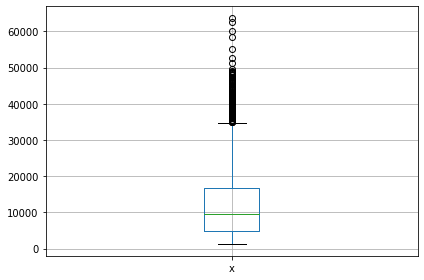

In [4]:
# check for outliers
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True


_, bp = pd.DataFrame.boxplot(newdf.claim, return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

print("Outliers: ", outliers)
outliers = np.array(outliers)
print(outliers.shape)
print("Boxes: ", boxes)
print("Medians: ", medians)
print("Whiskers: ", whiskers)

plt.show()

In [5]:
newdf = newdf[newdf.claim < 50000]
newdf.shape

(1325, 11)

#### splitting data feature and target

In [6]:
y = newdf.claim
X = newdf.drop(axis=1,columns=['index','PatientID','claim','region'])

#### Transform data to be usable

In [7]:
# changing data to be all numerical value
Gender = {'male':0,'female':1}
boolean = {'Yes':0,'No':1}
X.gender = [Gender[item] for item in newdf['gender']]
X.diabetic = [boolean[item] for item in newdf.diabetic]
X.smoker = [boolean[item] for item in newdf.smoker]

# Region = {'southeast':1,'northeast':2,'southwest':3,'northwest':4}
# X.region = [Region[item] for item in newdf.region]

X['southeast']= (newdf.region=='southeast').astype('int')
X['northwest']= (newdf.region=='northwest').astype('int')
X['southwest']= (newdf.region=='southwest').astype('int')
X['northeast']= (newdf.region=='northeast').astype('int')

#### Splitting data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [9]:
# train_data, test_data = train_test_split(newdf, test_size=0.25,random_state=13)
# print('(train) (test) new shape ',end=' = ')
# print(train_data.shape,test_data.shape)
# y_train, x_train = train_data.iloc[:,:1], train_data.iloc[:,1:]
# y_test, x_test = test_data.iloc[:,:1], test_data.iloc[:,1:]

#### scale X dataset

In [10]:
def scale_datasets(x_train,x_test):
    """
    Standard Scale test and train data
    Z-Score normalization
    """

    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(x_train),
        columns = x_train.columns
    )
    x_test_scaled = pd.DataFrame(
        standard_scaler.transform(x_test),
        columns= x_test.columns
    )

    return x_train_scaled, x_test_scaled

X_train_scaled, X_test_scaled = scale_datasets(X_train,X_test)

### Building Model

In [11]:
# #Build the model
# hidden_units1 = 20
# hidden_units2 = 40
# hidden_units3 = 20
# hidden_units4 = 20
# # hidden_units5 = 576

# learning_rate = 0.008

# #Create the model using Sequential in tf
# def build_model_Sequential():
#     model = Sequential([
#         Dense(hidden_units1,input_shape=(11,), kernel_initializer='normal', activation='relu'),
#         Dropout(0.2),
#         Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
#         Dropout(0.2),
#         Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
#         Dropout(0.2),
#         Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
#         # Dropout(0.2),
#         # Dense(hidden_units5, kernel_initializer='normal', activation='relu'),

#         Dense(1, kernel_initializer='normal', activation='relu')
#     ])
#     return model


In [63]:
# Model with (15,15,1) where 15 input node and 1 output
# 1 hidden layer with 15 nodes
model1 = Sequential()
model1.add(Dense(15, activation='relu', input_shape=(11,)))
model1.add(Dropout(0.3))
model1.add(Dense(15, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='linear'))


# Model with (30,30,1) where 30 input node and 1 output
# 1 hidden layer with 30 nodes
model2 = Sequential()
model2.add(Dense(30, activation='relu', input_shape=(11,)))
model2.add(Dropout(0.3))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='linear'))


# Model with (15,15,15,1) where 15 input node and 1 output
# 2 hidden layer with 15 and 15 nodes
model3 = Sequential()
model3.add(Dense(15, activation='relu', input_shape=(11,)))
model3.add(Dropout(0.3))
model3.add(Dense(15, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(15, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='linear'))


# Model with (15,30,45,1) where 15 input node and 1 output
# 2 hidden layer with 30 and 45 nodes
model4 = Sequential()
model4.add(Dense(15, activation='relu', input_shape=(11,)))
model4.add(Dropout(0.3))
model4.add(Dense(30, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(45, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(1, activation='linear'))


# Model with (45,30,15,1) where 45 input node and 1 output
# 2 hidden layer with 30 and 15 nodes
model5 = Sequential()
model5.add(Dense(45, activation='relu', input_shape=(11,)))
model5.add(Dropout(0.3))
model5.add(Dense(30, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(15, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(1, activation='linear'))

In [64]:
modelList = [model1, model2, model3, model4, model5]


In [49]:

# model = build_model_Sequential()
# #loss function 
# MAPE = MeanAbsolutePercentageError()
# msle = MeanSquaredLogarithmicError()
# model.compile(
#     loss = MAPE,
#     # optimizer = 'SGD',
#     optimizer = Adam(learning_rate=learning_rate),
#     metrics = [MAPE]
# )

#### Training model

In [65]:
MAPE = MeanAbsolutePercentageError()
learning_rate =0.08
histories = []
predictions = []
for i, model in enumerate(modelList):
    model.compile(loss=MAPE, optimizer=Adam(learning_rate=learning_rate), metrics=[MAPE])
    # early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Stop training if no improvement after 5 epochs
    history = model.fit(X_train_scaled, y_train, validation_split=0.25, epochs=50, batch_size=64, verbose=0)
    histories.append(history)
    prediction=model.predict(X_test_scaled)
    predictions.append(prediction)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 0s 804us/step


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 0s 783us/step


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 0s 914us/step


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 0s 921us/step


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 0s 1ms/step


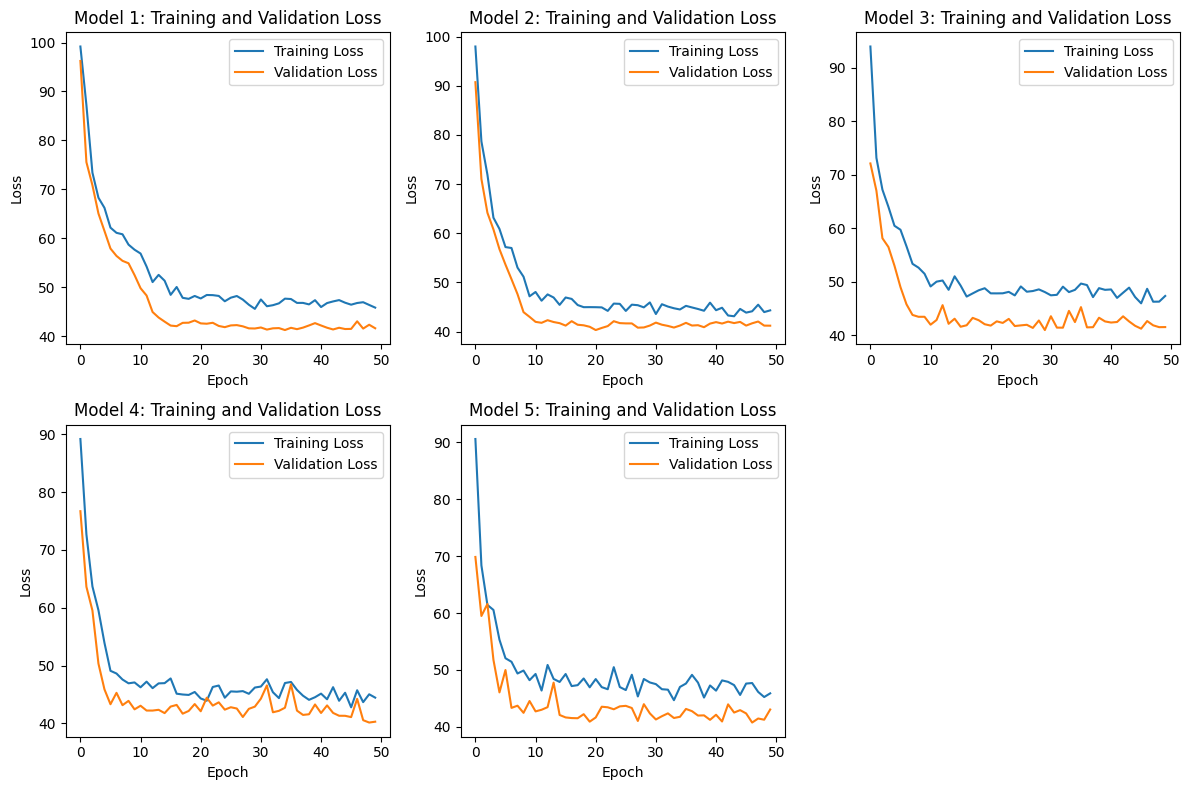

In [66]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.subplot(2, 3, i+1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {}: Training and Validation Loss'.format(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# #train the model
# history = model.fit(
#     X_train_scaled.values,
#     y_train.values,
#     epochs=40,
#     batch_size=64,
#     validation_split= 0.2
# )

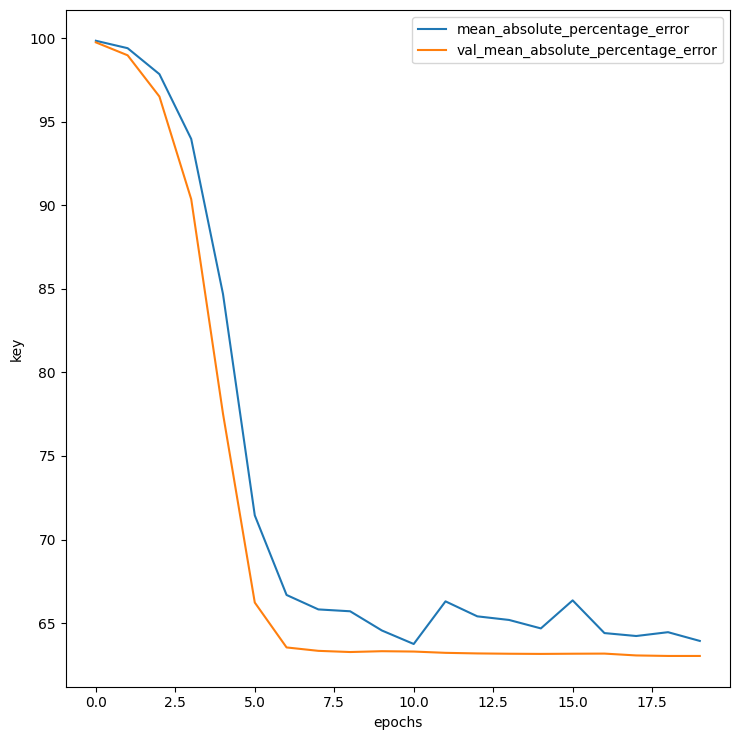

11/11 [==============================] - 0s 2ms/step


In [17]:
# def plot_history(history,key):
#     plt.plot(history.history[key])
#     plt.plot(history.history['val_'+key])
#     plt.xlabel("epochs")
#     plt.ylabel("key")
#     plt.legend([key,'val_'+key])
#     plt.show()

# plot_history(history,'mean_absolute_percentage_error')

# ## predict and save prediction
# prediction = model.predict(X_test_scaled)

In [18]:
print('Error check:- \nmeanabsolute = {0}\nmeansquared = {1}\nrootmeansq = {2}\nR^2 value = {3}\nMAPE = {4}'.format(mean_absolute_error(y_test,prediction),
                                                                     mean_squared_error(y_test,prediction),
                                                                     np.sqrt(mean_squared_error(y_test,prediction)),
                                                                     r2_score(y_test,prediction),
                                                                     mean_absolute_percentage_error(y_test,prediction)
                                                                     ))

Error check:- 
meanabsolute = 12390.301461022389
meansquared = 283976483.1119972
rootmeansq = 16851.601796624473
R^2 value = -1.1736714663988437
MAPE = 0.9937600960758826


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


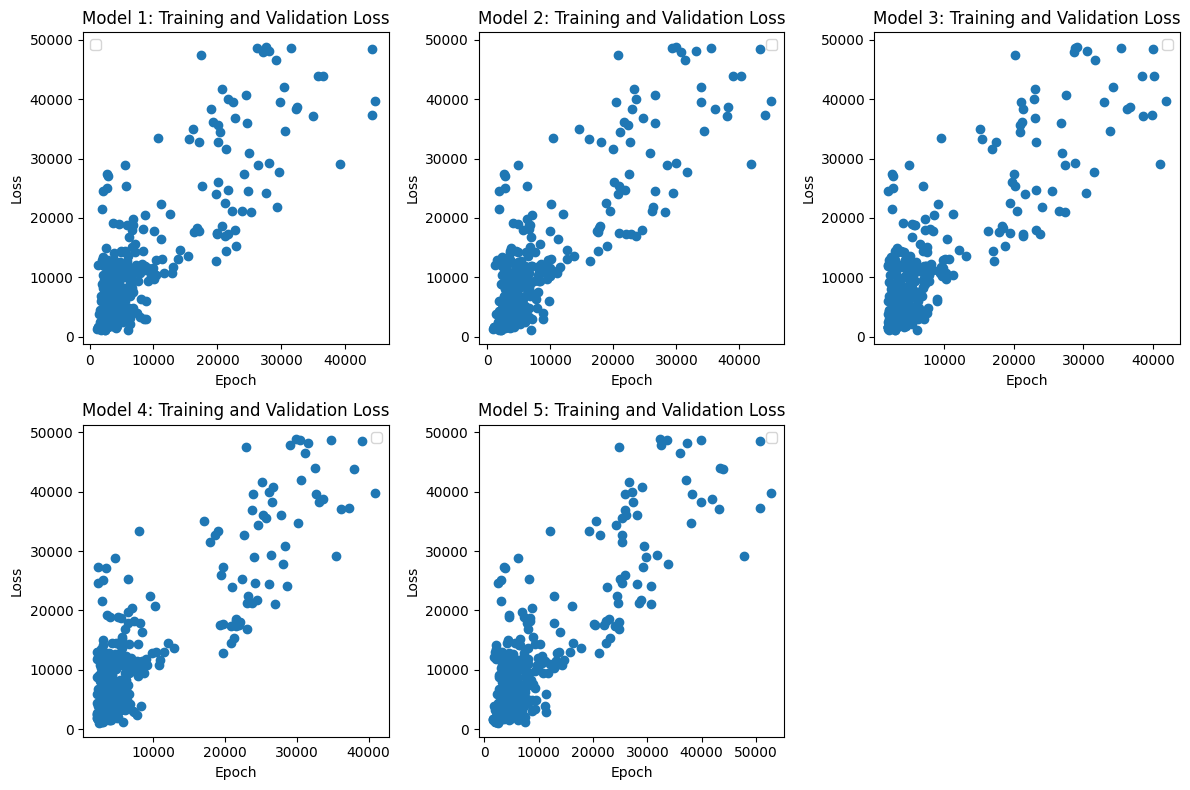

In [67]:
plt.figure(figsize=(12, 8))
for i, prediction in enumerate(predictions):
    plt.subplot(2, 3, i+1)
    plt.scatter(prediction,y_test)
    # plt.scatter(y_test, label='target')
    plt.title('Model {}: Training and Validation Loss'.format(i+1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

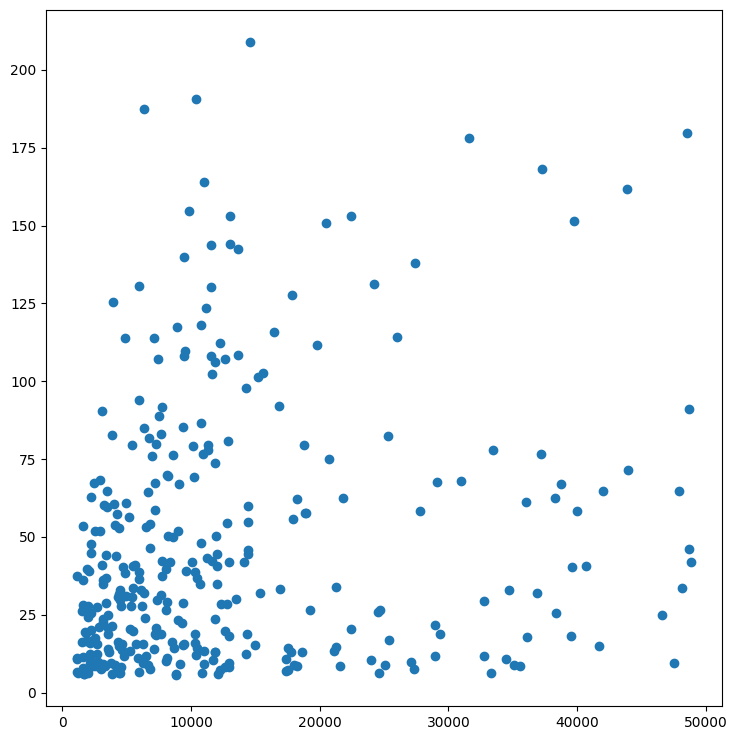

In [19]:
plt.scatter(y_test,prediction)

[[1396.8367  ]
 [1601.3472  ]
 [2578.5186  ]
 [ 169.54459 ]
 [1930.8746  ]
 [1943.3302  ]
 [1266.3585  ]
 [2052.9717  ]
 [2913.9     ]
 [1839.561   ]
 [ 993.26984 ]
 [ 361.51266 ]
 [1849.1761  ]
 [ 183.8454  ]
 [ 831.52374 ]
 [2275.7441  ]
 [1312.3943  ]
 [2600.4734  ]
 [2075.1309  ]
 [ 394.95755 ]
 [ 116.73026 ]
 [2606.3184  ]
 [2596.0427  ]
 [1235.0076  ]
 [1729.856   ]
 [2202.6343  ]
 [1449.1453  ]
 [1528.058   ]
 [1378.9869  ]
 [2052.0554  ]
 [2295.6519  ]
 [ 348.93985 ]
 [3352.3462  ]
 [1051.8207  ]
 [2700.5671  ]
 [2355.3857  ]
 [1515.4551  ]
 [2364.5828  ]
 [2384.4949  ]
 [1948.6505  ]
 [1399.89    ]
 [3052.5198  ]
 [2811.8982  ]
 [ 810.29474 ]
 [ 793.01843 ]
 [1666.3866  ]
 [1222.457   ]
 [ 910.3356  ]
 [2647.9534  ]
 [2187.6362  ]
 [1207.9207  ]
 [ 221.82639 ]
 [1636.1334  ]
 [1523.1471  ]
 [1120.0021  ]
 [ 816.46643 ]
 [  34.744183]
 [ 537.39307 ]
 [ 268.23392 ]
 [1363.2029  ]
 [ 596.02637 ]
 [2550.921   ]
 [2231.6694  ]
 [2404.4111  ]
 [2561.2085  ]
 [1527.5033  ]
 [ 417.729